In [1]:
!pip install pytube opencv-python ipywidgets

In [3]:
!pip install yt-dlp


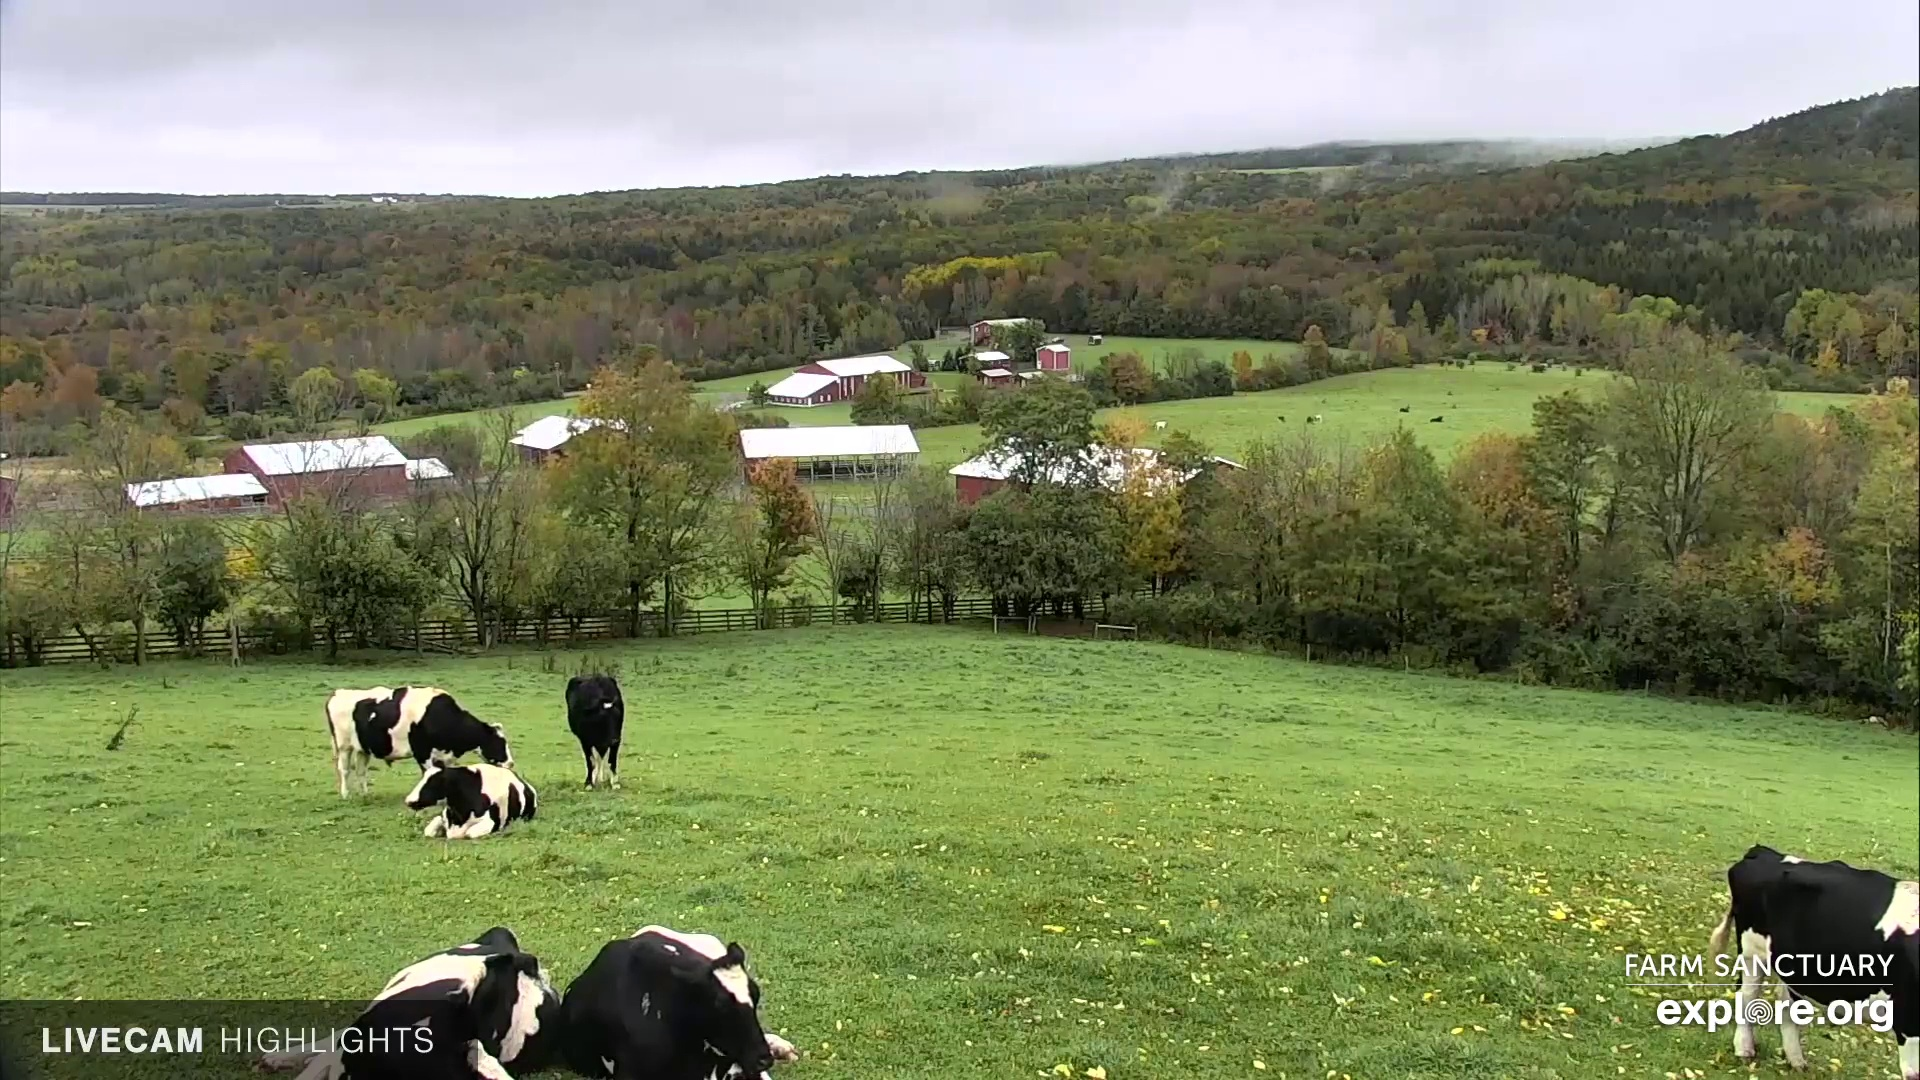

KeyboardInterrupt: 

In [13]:
import cv2
import subprocess
from IPython.display import display, clear_output, Image
import time

def get_live_stream_url(youtube_url):
    
    try:
        result = subprocess.run(
            ["yt-dlp", "-g", youtube_url],
            capture_output=True,
            text=True,
            check=True,
        )
        live_url = result.stdout.strip()
        return live_url
    except subprocess.CalledProcessError as e:
        print("Error fetching live stream URL:", e.stderr)
        return None

def process_live_stream_in_notebook(stream_url, target_fps):
    
    cap = cv2.VideoCapture(stream_url)
    
    if not cap.isOpened():
        print("Error: Could not open video stream.")
        return
    
    # Reduce frame rate
    original_fps = cap.get(cv2.CAP_PROP_FPS) or 30  # Default to 30 if FPS is not available
    frame_skip = int(original_fps / target_fps) if original_fps > target_fps else 1
    print(f"Original FPS: {original_fps}, Target FPS: {target_fps}, Frame Skip: {frame_skip}")
    
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Stream ended or error occurred.")
            break
        
        
        if frame_count % frame_skip == 0:
            
            _, buffer = cv2.imencode('.jpg', frame)
            frame_image = Image(data=buffer.tobytes())
            
            # Display the frame in the notebook
            clear_output(wait=True)
            display(frame_image)
        
        frame_count += 1

        
        time.sleep(1 / target_fps)

    cap.release()

# Example usage
youtube_live_url = "https://www.youtube.com/live/dKFwk3MDu74?si=CP7S-JHxRESYJtMl"
target_frame_rate = 15  # Desired FPS


stream_url = get_live_stream_url(youtube_live_url)
if stream_url:
    process_live_stream_in_notebook(stream_url, target_frame_rate)
